In [43]:
from data.binary_data import generate_data
from algorithms.perceptron import perceptron_learning, perc_predict
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from algorithms.delta import delta_rule, delta_predict
import algorithms.plot as p
from data.binary_data import generate_data_ex3, split_50, split_25, split_A
from algorithms.metrics import precision, recall

In [2]:
n = 100
mA = [1.5, 2.0]
sigA = 0.5
mB = [-2.5, 0]
sigB = 0.5

X, y = generate_data(n, mA, sigA, mB, sigB, seed=39)

# Comparison of perceptron learning and delta rule

## Learning rate

(200, 3)
Number of epochs: 13


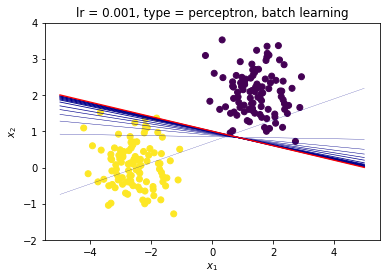

break after iteration 16


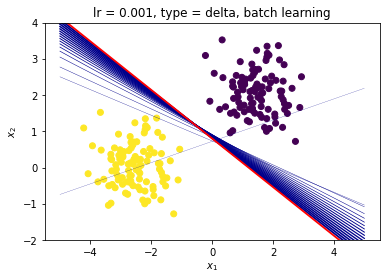

In [3]:
lr = 0.001
plt.ylim([-2,4])
w_per, history = perceptron_learning(X, y, lr=lr, max_iters=250)
p.plot_boundarys(history,X,y,'perceptron', 'batch', lr)

plt.ylim([-2,4])
w_del, history = delta_rule(X, y, lr=lr)
p.plot_boundarys(history,X,y,'delta', 'batch', lr=lr)

(200, 3)
Number of epochs: 2


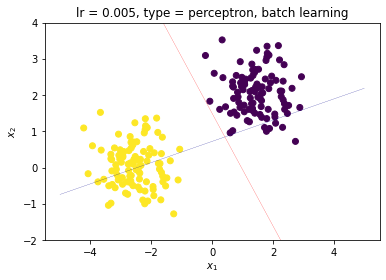

In [4]:
lr = 0.005
w_per, history = perceptron_learning(X, y, lr=lr, max_iters=100)
plt.ylim([-2,4])
p.plot_boundarys(history,X,y,'perceptron','batch', lr)


(200, 3)
Number of epochs: 7


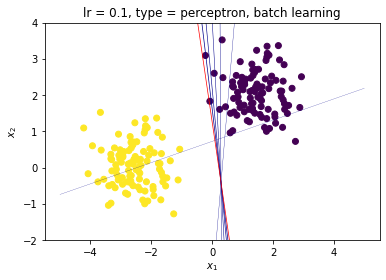

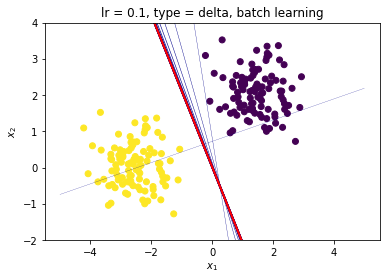

In [6]:
lr = 0.1
w_per, history = perceptron_learning(X, y, lr=lr, max_iters=100)
plt.ylim([-2,4])
p.plot_boundarys(history,X,y,'perceptron','batch', lr)

w_del, history = delta_rule(X, y, lr=lr, max_iters=20)
plt.ylim([-2,4])
p.plot_boundarys(history,X,y,'delta','batch', lr)

# Sequential vs batch learning for delta rule

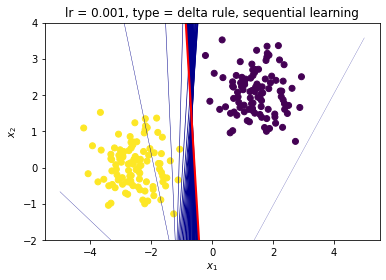

In [7]:
w_del, history = delta_rule(X, y,lr=0.001,seed=999,sequential=1)
plt.ylim([-2,4])
p.plot_boundarys(history,X,y,'delta rule','sequential', 0.001,update_size=0.1, start_size=0.1)

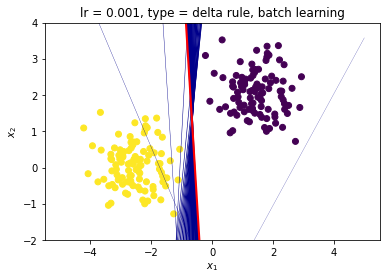

In [8]:
w_del, history = delta_rule(X, y,lr=0.001,seed=999)
plt.ylim([-2,4])
p.plot_boundarys(history,X,y,'delta rule','batch',0.001, 0.1)

break after iteration 2


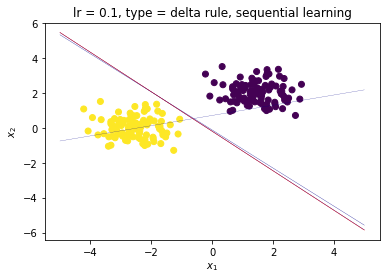

In [13]:
w_del, history = delta_rule(X, y,lr=0.1,sequential=1)
p.plot_boundarys(history,X,y,'delta rule','sequential', 0.1,update_size=0.1, start_size=0.1)

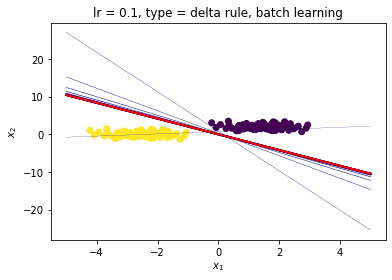

In [14]:
w_del, history = delta_rule(X, y,lr=0.1)
p.plot_boundarys(history,X,y,'delta rule','batch', 0.1)

# Importance of bias term

In [31]:
n = 100
mA = [3.5, 2.0]
sigA = 0.5
mB = [0, 0]
sigB = 0.5

X, y = generate_data(n, mA, sigA, mB, sigB, seed=39)
lr = 0.001

## Without bias

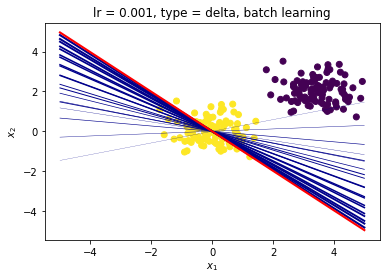

In [34]:
w_del, history = delta_rule(X, y, lr=lr)
p.plot_boundarys(history,X,y,'delta', 'batch', lr, bias=False)

## With bias

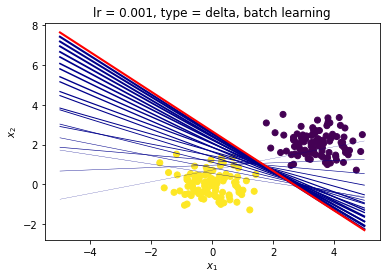

In [33]:
w_del, history = delta_rule(X, y, lr=lr)
p.plot_boundarys(history,X,y,'delta', 'batch', lr)

# Non linearly separable data

In [35]:
n = 100
mA = [1.5, 1.5]
sigA = 1
mB = [-2, 1.5]
sigB = 1

X, y = generate_data(n, mA, sigA, mB, sigB, seed=39)

(200, 3)
Number of epochs: 100


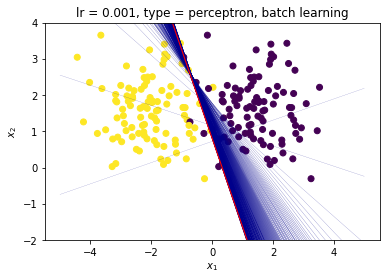

break after iteration 23


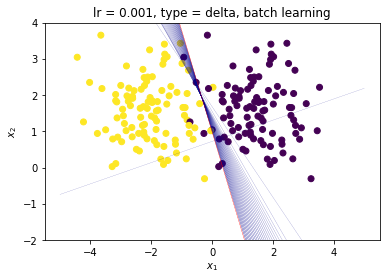

In [36]:
lr = 0.001
plt.ylim([-2,4])
w_per, history = perceptron_learning(X, y, lr=lr, max_iters=100)
p.plot_boundarys(history,X,y,'perceptron', batch='batch', lr=lr, update_size=0.01)

plt.ylim([-2,4])
w_del, history = delta_rule(X, y, lr=lr, max_iters=100)
p.plot_boundarys(history,X,y,'delta', batch='batch', lr=lr,  update_size=0.01)

PERCEPTRON LEARNING
(200, 3)
Number of epochs: 100


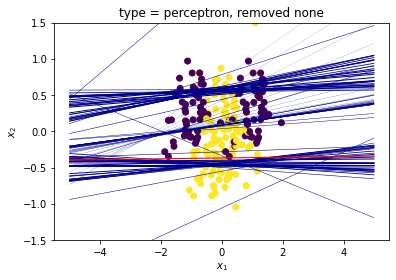

Precision for A: 0.6666666666666666, for B: 0.5164835164835165
Recall for A: 0.12, for B: 0.94

DELTA RULE
break after iteration 16


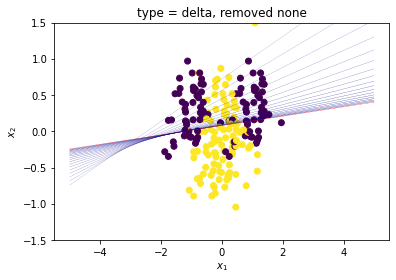

(3,)
(200, 3)
Precision for A: 0.7, for B: 0.7
Recall for A: 0.7, for B: 0.7


(0.7, 0.7)

In [44]:
data_ex3 = generate_data_ex3()
X, y = data_ex3[:, :2], data_ex3[:, 2]
lr = 0.001

print("PERCEPTRON LEARNING")
plt.ylim([-1.5,1.5])
w_per, history = perceptron_learning(X, y, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'perceptron',  split_type=r'none', update_size=0.01)
y_pred = perc_predict(X, w_per)
precision(y, y_pred)
recall(y, y_pred)

print()
print("DELTA RULE")
plt.ylim([-1.5,1.5])
w_del, history = delta_rule(X, y, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'delta', split_type=r'none',  update_size=0.01)
y_pred = delta_predict(X, w_del)
precision(y, y_pred)
recall(y, y_pred)

### Removed 50% of class B (yellow)

Text(0, 0.5, '$x_2$')

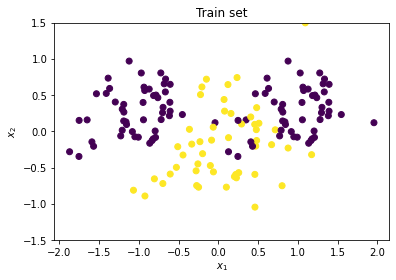

In [45]:
X_train, X_test, y_train, y_test = split_50(data_ex3, class_label=1)
plt.ylim([-1.5,1.5])
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.title('Train set')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

PERCEPTRON LEARNING
(150, 3)
Number of epochs: 100


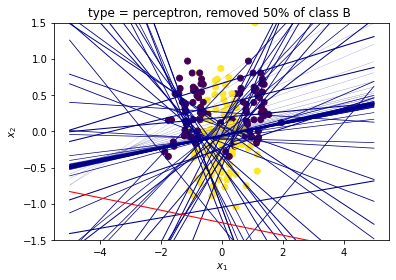

Precision for A: 0.6433566433566433, for B: 0.8596491228070176
Recall for A: 0.92, for B: 0.49

DELTA RULE
break after iteration 17


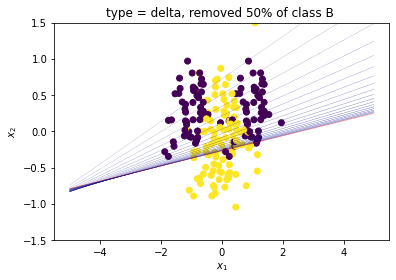

(3,)
(200, 3)
Precision for A: 0.6139240506329114, for B: 0.9285714285714286
Recall for A: 0.97, for B: 0.39


(0.97, 0.39)

In [46]:
print("PERCEPTRON LEARNING")
plt.ylim([-1.5,1.5])
w_per, history = perceptron_learning(X_train, y_train, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'perceptron',  split_type=r'50% of class B ', update_size=0.01)
y_pred = perc_predict(X, w_per)
precision(y, y_pred)
recall(y, y_pred)

print()
print("DELTA RULE")
plt.ylim([-1.5,1.5])
w_del, history = delta_rule(X_train, y_train, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'delta', split_type=r'50% of class B ',  update_size=0.01)
y_pred = delta_predict(X, w_del)
precision(y, y_pred)
recall(y, y_pred)

### Removed 50% of class A for training


Text(0, 0.5, '$x_2$')

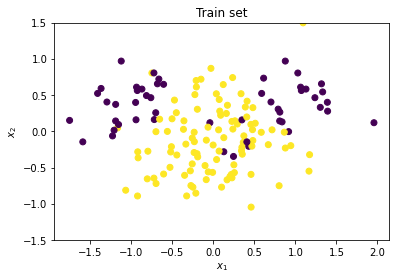

In [47]:
X_train, X_test, y_train, y_test = split_50(data_ex3, class_label=-1)
plt.ylim([-1.5,1.5])
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.title('Train set')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

PERCEPTRON LEARNING
(150, 3)
Number of epochs: 100


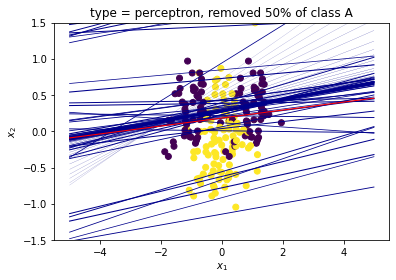

Precision for A: 0.7297297297297297, for B: 0.5521472392638037
Recall for A: 0.27, for B: 0.9

DELTA RULE
break after iteration 12


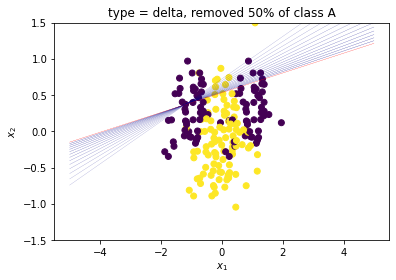

(3,)
(200, 3)
Precision for A: 0.7272727272727273, for B: 0.5449101796407185
Recall for A: 0.24, for B: 0.91


(0.24, 0.91)

In [48]:
X_train, X_test, y_train, y_test = split_50(data_ex3, class_label=-1)
print("PERCEPTRON LEARNING")
plt.ylim([-1.5,1.5])
w_per, history = perceptron_learning(X_train, y_train, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'perceptron',  split_type=r'50% of class A', update_size=0.01)
y_pred = perc_predict(X, w_per)
precision(y, y_pred)
recall(y, y_pred)

print()
print("DELTA RULE")
plt.ylim([-1.5,1.5])
w_del, history = delta_rule(X_train, y_train, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'delta', split_type=r'50% of class A',  update_size=0.01)
y_pred = delta_predict(X, w_del)
precision(y, y_pred)
recall(y, y_pred)

### Removed 20% from left and 80% of right cluster of class A


Text(0, 0.5, '$x_2$')

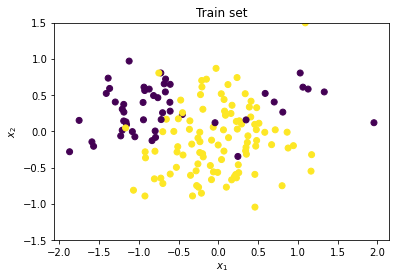

In [49]:
X_train, X_test, y_train, y_test = split_A(data_ex3)
plt.ylim([-1.5,1.5])
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.title('Train set')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

PERCEPTRON LEARNING
(150, 3)
Number of epochs: 100


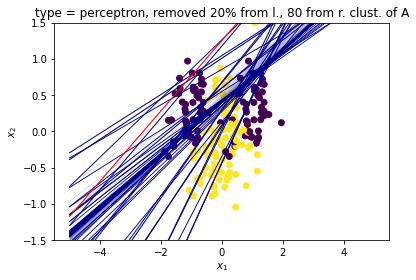

Precision for A: 0.574468085106383, for B: 0.5660377358490566
Recall for A: 0.54, for B: 0.6

DELTA RULE
break after iteration 17


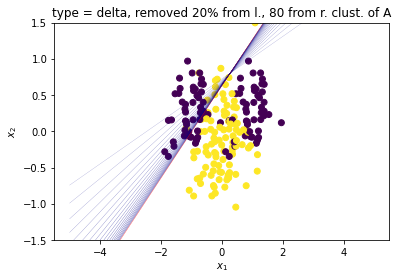

(3,)
(200, 3)
Precision for A: 0.8125, for B: 0.5986842105263158
Recall for A: 0.39, for B: 0.91


(0.39, 0.91)

In [50]:
print("PERCEPTRON LEARNING")
plt.ylim([-1.5,1.5])
w_per, history = perceptron_learning(X_train, y_train, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'perceptron',  split_type=r'20% from l., 80 from r. clust. of A', update_size=0.01)
y_pred = perc_predict(X, w_per)
precision(y, y_pred)
recall(y, y_pred)

print()
print("DELTA RULE")
plt.ylim([-1.5,1.5])
w_del, history = delta_rule(X_train, y_train, lr=lr, max_iters=100)
p.plot_boundarys_ex3(history,X,y,'delta', split_type=r'20% from l., 80 from r. clust. of A',  update_size=0.01)
y_pred = delta_predict(X, w_del)
precision(y, y_pred)
recall(y, y_pred)